In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os, fnmatch
import math
from matplotlib import animation, rc
from IPython.display import HTML


In [3]:
%matplotlib inline

## Problem 2. Solitary wave propagation and grid effects

A solitary wave is simulated ussing the Boussinesq equations with the following parameters:

amplitude = 0.1

constant depth = 1

The grid size will be analysed. First, we use $\Delta x = 2$

In [4]:
!cat 'flat_results/flat2/indat'

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
75
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


Below you see the initial condition at $x = 20$.

In [5]:
a = np.loadtxt('flat_results/flat2/eta0',unpack=True)


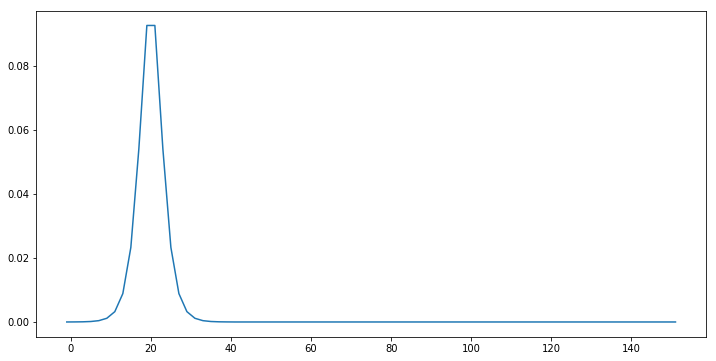

In [6]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
plt.plot(a[0], a[1])


Below you see the time evolution up to $t = 70$.

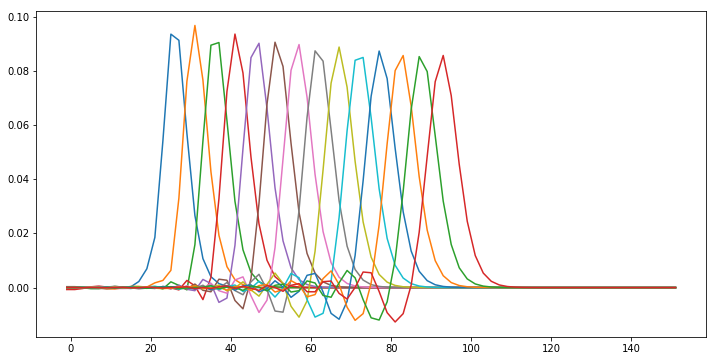

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flat2/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

Dispersion occurs using $\Delta x = 2$.

Now we repeat the same procedure with $\Delta x = 1$.

Below you see the initial condition at $x = 20$.

In [8]:
! cat ./flat_results/flat1/indat

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
150
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


In [9]:
a = np.loadtxt('flat_results/flat1/eta0',unpack=True)


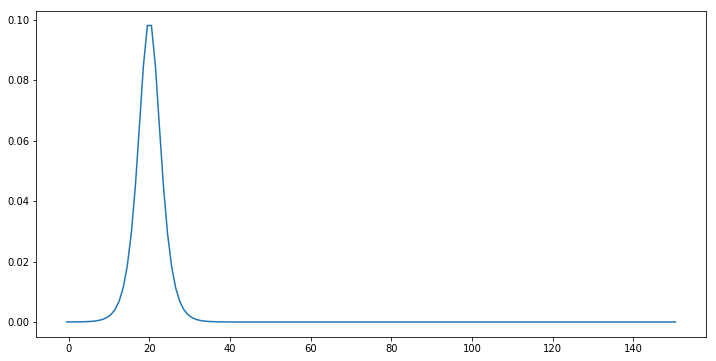

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1),
plt.plot(a[0],a[1])

Below you see the time evolution up to $t = 70$.

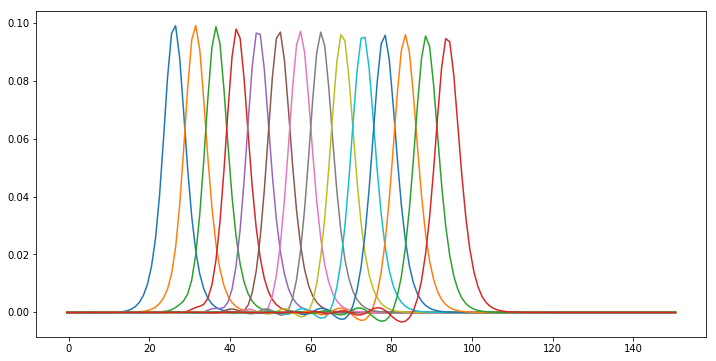

In [11]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flat1/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

Dispersion is weaker using $\Delta x = 1$ than using $\Delta x = 2$.

Now we repeat the same procedure with $\Delta x = 0.5$.

Below is the initial condition at $x = 20$.

In [12]:
!cat ./flat_results/flathf/indat

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
300
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
72
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 5:70;5


In [13]:
a = np.loadtxt('flat_results/flathf/eta0',unpack=True)


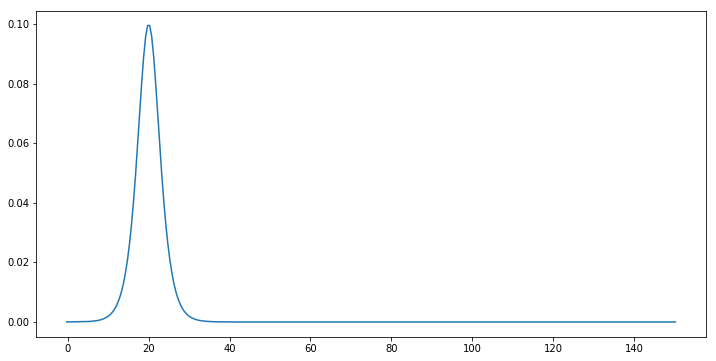

In [14]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
plt.plot(a[0],a[1])


Here, the time series up to $t = 72$ is shown.

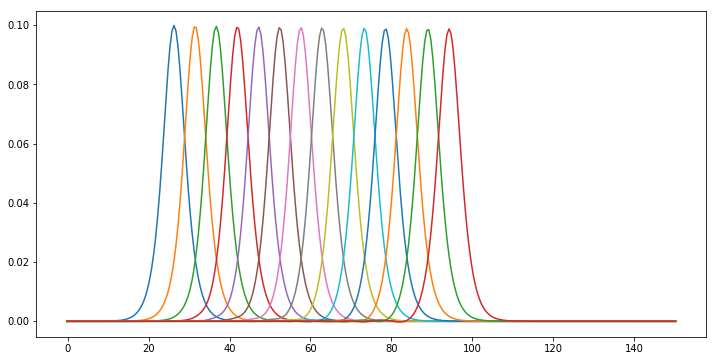

In [15]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
for i in np.arange(6,72,5):
    num = str(i)
    a = np.loadtxt('flat_results/flathf/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

The dispersion is not visible anymore with your eyes using $\Delta x = 0.5$.

Now, we depict all three solution at $t = 71$ in the same diagramme and compare the maximums in $\eta$.

The maximum $\eta$ when choosing $\Delta x = 2$ is 0.086
The maximum $\eta$ when choosing $\Delta x = 1$ is 0.095
The maximum $\eta$ when choosing $\Delta x = 0.5$ is 0.099


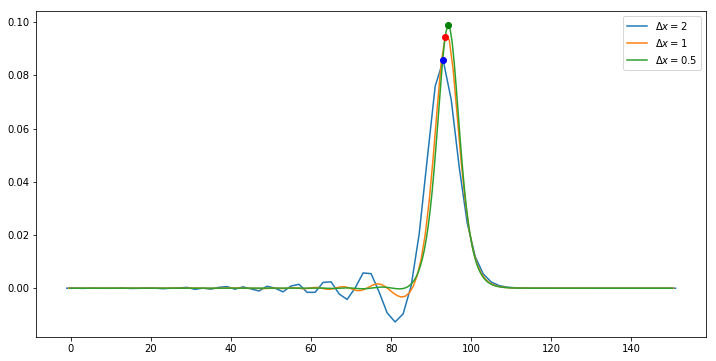

In [16]:
num = '71'

a = np.loadtxt('flat_results/flat2/eta'+num,unpack=True)
b = np.loadtxt('flat_results/flat1/eta'+num,unpack=True)
c = np.loadtxt('flat_results/flathf/eta'+num,unpack=True)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
plt.plot(a[0], a[1], label='$\Delta x = 2$')
plt.plot(b[0], b[1], label='$\Delta x = 1$')
plt.plot(c[0], c[1], label='$\Delta x = 0.5$')

max1 = max(a[1])
max2 = max(b[1])
max3 = max(c[1])
a1 = [i for i, j in enumerate(a[1]) if j == max1]
b1 = [i for i, j in enumerate(b[1]) if j == max2]
c1 = [i for i, j in enumerate(c[1]) if j == max3]
plt.plot(a[0][a1[0]],max1,'bo',b[0][b1[0]],max2,'ro',c[0][c1[0]],max3,'go')
plt.legend()

print('The maximum $\eta$ when choosing $\Delta x = 2$ is %.3f' %max1)
print('The maximum $\eta$ when choosing $\Delta x = 1$ is %.3f' %max2)
print('The maximum $\eta$ when choosing $\Delta x = 0.5$ is %.3f' %max3)

The maximum in $\eta$ converts to the value of the initial amplitude, $\alpha = 0.1$, with a finer grid resolution. The maximum is lower the larger the dispersion is, because a conservation of water volume has to be maintained: A lower water level behind the wave causes a lower maximum.

A grid resolution of $\Delta x = 0.5$ is reasonable enough. The error in the maximum in $\eta$ is only: $e = \frac{0.1-0.099}{0.1} = 1\%$.


So far we have showed a numerical Boussinesq simulation of a solitary wave. Numerical dispersion, which vanishes with a small enough gird size, is dependend on the grid resolution.

## Problem 3. Numerical instability

We will switch from a Boussinesq simulation to a LSW simulation. Still, we use a solitary wave for the initial condition.

The following parameters are used:

$\Delta x = 0.5$

$\Delta t = 1$

and a reduction factor of $0.5$ results in a exact numerical solution ($Co = 1$).

In [17]:
!cat 'flat_results/lsw3/indat'

!give bathimetry option/readfromfile/
h
! give bathimetry option/readfromfile/
flat
! give total length/  150./
150 
!Give number of grid points/ 100/
300
! give equation type/LSW/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.100000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
41
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:40;5


Below is the initial condition at $x=20$.

In [18]:
a = np.loadtxt('flat_results/lsw3/eta0',unpack=True)


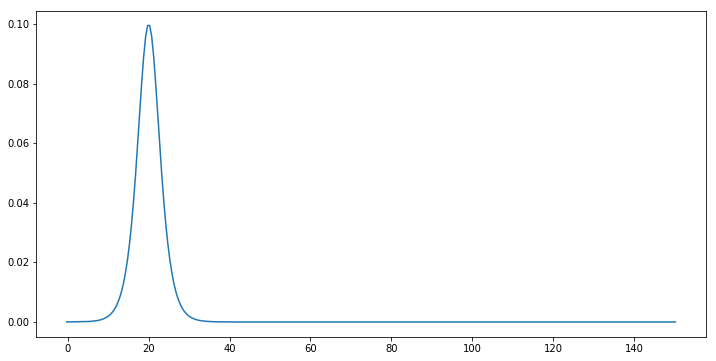

In [19]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
plt.plot(a[0],a[1])


Here, the time evolution up to $t = 41$ is shown.

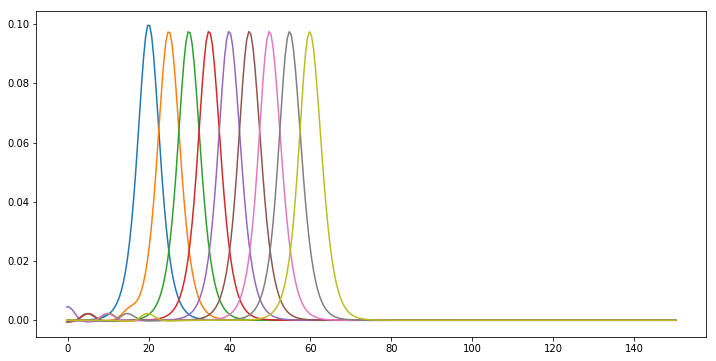

In [20]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
for i in np.arange(0,41,5):
    num = str(i)
    a = np.loadtxt('flat_results/lsw3/eta'+num,unpack=True)
    plt.plot(a[0], a[1])
    

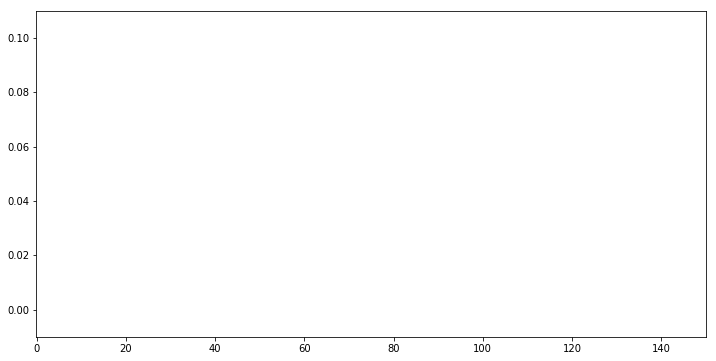

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlim(( -0.05, 150))
ax.set_ylim((-0.01, 0.11))

line, = ax.plot([], [], lw=2)
time_text = ax.text(0.8, 1.1, '', fontsize=20,transform=ax.transAxes)

In [22]:
def init():
    line.set_data([], [])
    time_text.set_text('')
    return (line, time_text,)


In [23]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/lsw3/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [24]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,41,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

We let the simulation run. Then an initial condition splits into two solutions travelling in both directions.

In the previous case we use the Boussinesq equations. A solitary wave is used for the initial condition, which is a solution for non-linear and dispersive systems like the Boussinesq equations. It means that the initial condition is already a solution. That's why the wave does not split into two waves travelling in both directions. As a result the solitary wave keeps the initial shape and travels along the positive x-direction.

In this case we use the LSW equations. The solitary wave solution is no longer an exact solution. It means that the initial condition is not already a solution. Therefore, the solitary wave splits into two solutions, one with a similar shape as the solitary wave itself and another solution with a relatively small amplitude. Both are travelling in opposite directions.


Up to this point, we have showed a numerical Boussinesq and LSW simulation of a solitary wave. Next we will use a different initial condition for the simulations.

## Problem 4. Wave dispersion

We change from a solitary wave initial condition to an initial condition that yields a wave in each direction with half the initial amplitude.

$$\eta (x,0) = {2A\cos^{2}\left(\frac{\pi(x-x_{0})}{\lambda}\right) \quad \text{if} \quad -\frac{1}{2}\lambda < x-x_{0} < \frac{1}{2}\lambda  \atopwithdelims \{ . 0 \quad\quad\quad \text{otherwise}}$$

We choose $\lambda = 20$, $x_{0}=0$, $L=100$ and $t=80$.

In [25]:
def eta(x,x0,lam):
    A = 0.1
    dif = x-x0
    fun = np.zeros(len(x))
    for i in range(len(x)):
        if -0.5*lam < dif[i] < 0.5*lam:
            fun[i] = 2*A*np.cos(np.pi*dif[i]/lam)**2
    return fun

In [26]:
a = np.loadtxt('flat_results/flat1/eta0',unpack=True)


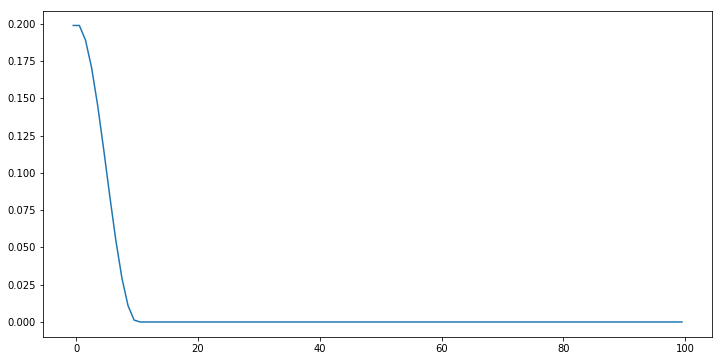

In [27]:
ola = eta(a[0],0,20)
cosa =a[0]
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1,1)
plt.plot(cosa[0:101],ola[0:101])


We show here that the first derivative of the initial condition is continuous. Also, we show that this initial condition results in a wave travelling in each direction after having run the code.

The spatial derivative of $\eta$ is:

$$\frac{\partial\eta}{\partial x}  =   \frac{\partial}{\partial x} 2A\cos^{2}\left(\frac{\pi(x-x_{0})}{\lambda}\right)    =- \frac{4 \pi}{\lambda} A \sin{\left (\frac{\pi}{\lambda} \left(- x_{0} + x\right) \right )} \cos{\left (\frac{\pi}{\lambda} \left(- x_{0} + x\right) \right )} = \frac{2 \pi}{\lambda} A \sin{\left (\frac{2 \pi}{\lambda} \left(x_{0} - x\right) \right )}$$

We consider the expansions $\sin{x} \approx x + \frac{1}{6}x^3 + ... $. We apply them to the derivative above, take the leading order around $x_0$ only and come up with

$$\frac{\partial\eta}{\partial x} \approx - \frac{4 A}{\lambda^{2}} \pi^{2} \left(x- x_{0} \right) + \mathcal{O}\left(\left(x- x_{0}\right)^{3}; x\rightarrow x_{0}\right) $$


We know now that the leading order of the first derivative is continuous. See the plot below:

The first derivative of initial condition $\eta$ and its leading order ($\lambda = 20$, $x_{0} = 0$, $A = 1$): 
![ex 4](leadingOfirstderiv.png " ")

Let us show that this initial condition leads to a wave travelling in each direction with half the initial amplitude.

We take one of the LSW equations as an example to show that the initial condition $\eta(x,0)$ splits into two waves with half the initial amplitude.

$$ \frac{\partial u}{\partial t} = - \frac{\partial \eta}{\partial x} $$

We take the following ansatz as a solution of the LSW equations: Two waves travelling in each direction, F and G.

$$ \eta(x,t) = F(x-c_0t) + G(x+c_0t) $$

We insert this ansatz into the LSW equation.

$$ \frac{\partial \eta}{\partial x} = F'(x-c_0t) + G'(x+c_0t) = - \frac{\partial u}{\partial t} $$

We solve it for $u$ and come up with the following expression.

$$ u(x,t) = \int \frac{\partial \eta}{\partial x} dt = \int (F'(x-c_0t) + G'(x+c_0t)) dt = -\frac{1}{c_0} F(x-c_0t) + \frac{1}{c_0} G(x+c_0t) $$


Applying the initial condition $\eta_0 = 2A\cos^{2}\left(\frac{\pi(x-x_{0})}{\lambda}\right) $ to the ansatz, we come up with the initial waves, $F(x)$ and $G(x)$, summed up in the following way:

$$ \eta(x,0) = F(x) + G(x) = 2A\cos^{2}\left(\frac{\pi(x-x_{0})}{\lambda}\right) $$

Applying the initial condition $u_0 = 0$ to the ansatz, we come up with the fact that both waves, $F(x) \text{ and } G(x)$ are identical at the initial time $t_0$.

$$ u(x,0) = -\frac{1}{c_0} F(x) + \frac{1}{c_0} G(x) \Rightarrow \quad F(x) = G(x) = A\cos^{2}\left(\frac{\pi(x-x_{0})}{\lambda}\right) $$

The superposition of these two waves at $t_0$ yields a wave with double initial amplitude. Then, at later time, the superposed wave at $t_0$ splits into two equal waves that travel in opposite directions, because we defined $F$ travelling in positive $x$-direction and $G$ in negative $x$-direction.

Taken together, we have an initial condition that is a superposition of two waves travelling in each direction.

We write the input files *h* and *eta.in*

In [28]:
arc = open('flat_results/cosine/eta.in','w')
np.savetxt(arc,np.c_[cosa[0:101],ola[0:101]])
arc.close()


In [29]:
h = np.ones(101)
arc = open('flat_results/cosine/h','w')
np.savetxt(arc,np.c_[cosa[0:101],h])
arc.close()


In [30]:
!cat ./flat_results/cosine/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
100
! give equation type/LSW/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
82
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:81;5


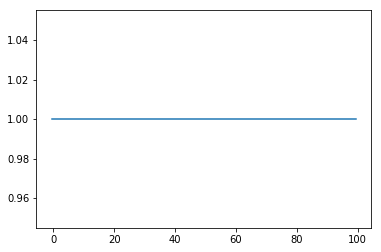

In [31]:
a = np.loadtxt('flat_results/cosine/h',unpack=True)
plt.plot(a[0],a[1])


### a) Grid Size

We solve the LSW equations and change the grid size to obtain a "good" result, first we try with $\Delta x = 1$

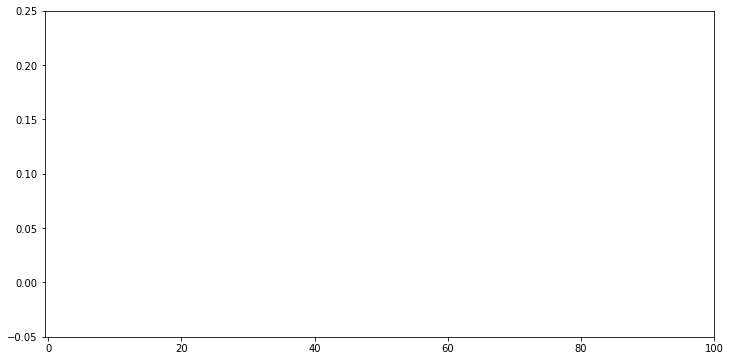

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlim(( -0.5, 100))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)
time_text = ax.text(0.8, 1.1, '', fontsize=20,transform=ax.transAxes)

In [33]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)


In [34]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


We plot the initial condition and the solution at time $t=80$

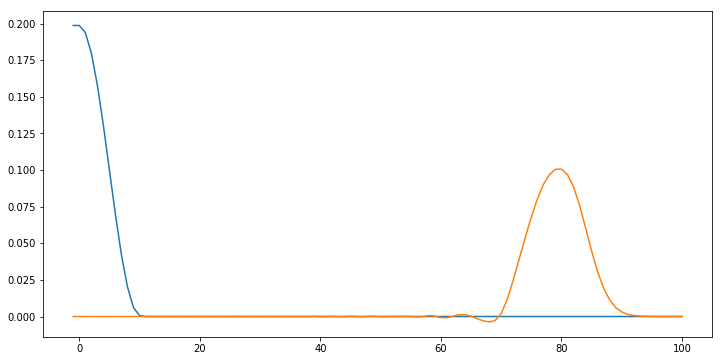

In [35]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/cosine/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine/eta80',unpack=True)
plt.plot(b[0], b[1])


We see we have dispersion in the back of the wave, so refinig the grid will diminish this effect


Now we change the resolution to $\Delta x = 0.5$

In [36]:
!cat ./flat_results/cosine200/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
200
! give equation type/LSW/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
82
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:81;5


In [37]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine200/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [38]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())



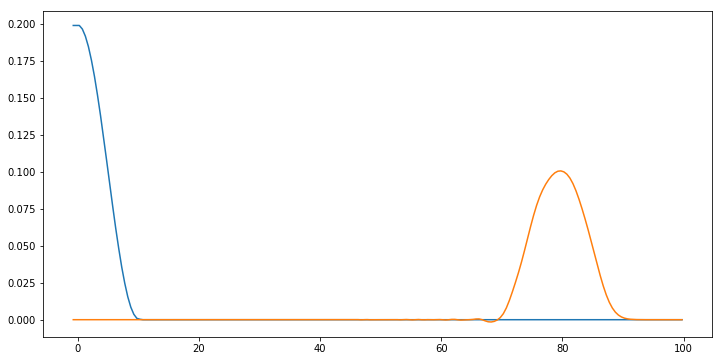

In [39]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/cosine200/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine200/eta80',unpack=True)
plt.plot(b[0], b[1])


We see how the dispersion is smaller than before

Finally we try $\Delta x = 0.25$

In [40]:
!cat flat_results/cosine400/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
400
! give equation type/LSW/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
82
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:81;5


In [41]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine400/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)


In [42]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


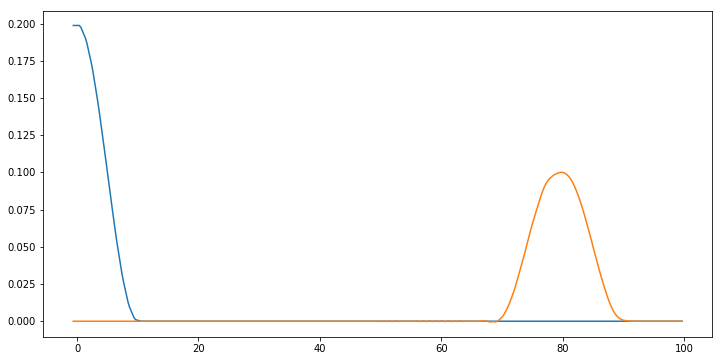

In [43]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/cosine400/eta0',unpack=True)
plt.plot(a[0], a[1])
b = np.loadtxt('flat_results/cosine400/eta80',unpack=True)
plt.plot(b[0], b[1])


We see how the dispersion has almost disappeared

Below here it is just a small parehtesis to the problem that we added to see the dispersion between the waves when they split.

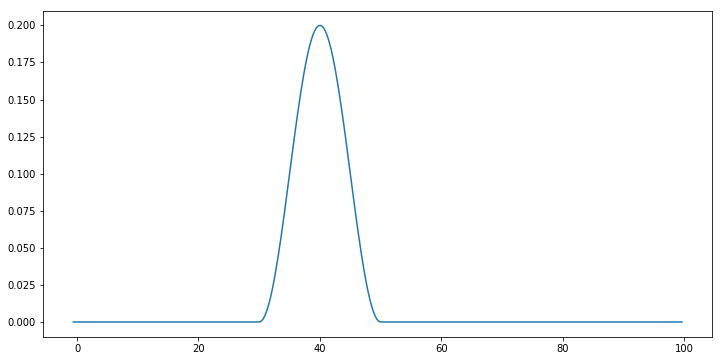

In [44]:
ola = eta(a[0]-40,0,20)
cosa =a[0]
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
plt.plot(cosa,ola)

In [45]:
arc = open('flat_results/cosine_move/eta.in','w')
np.savetxt(arc,np.c_[cosa,ola])
arc.close()

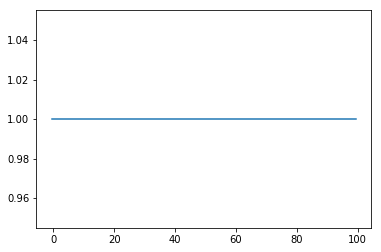

In [46]:
a = np.loadtxt('flat_results/cosine400/h',unpack=True)
plt.plot(a[0],a[1])

In [47]:
arc = open('flat_results/cosine_move/h','w')
np.savetxt(arc,np.c_[cosa[0:-1],a[1]])
arc.close()

In [48]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/cosine_move/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [49]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())


It is the two waves spliting. there is dipersion with a non fine grid, when $\Delta x = 1$

### b)  Linearized Boussinesq

In [50]:
! cat ./flat_results/lbous/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
400
! give equation type/LSW/
LBouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
82
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:81;5


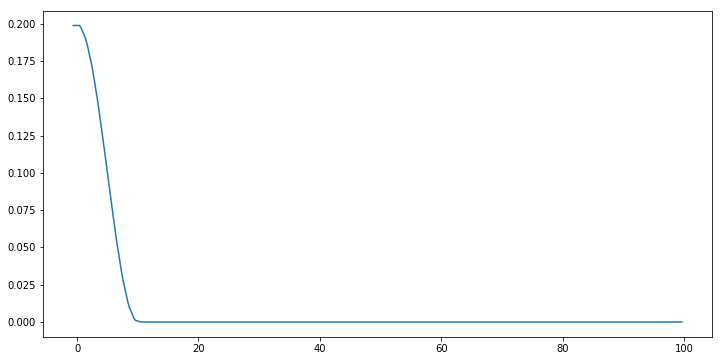

In [51]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/lbous/eta0',unpack=True)
plt.plot(a[0],a[1])

In [52]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/lbous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [53]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

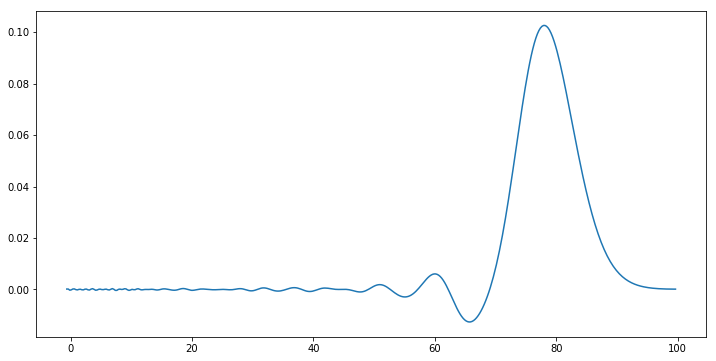

In [54]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/lbous/eta80',unpack=True)
plt.plot(a[0],a[1])

The physical disperion is visible.

This solution is the same for the linearised Boussinesq results in the course leaflet. The solution has got dispersion, but no non-linearities.

### c) Full Boussineq

In [55]:
!cat ./flat_results/fbous/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
400
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
82
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:81;5


In [56]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/fbous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [57]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

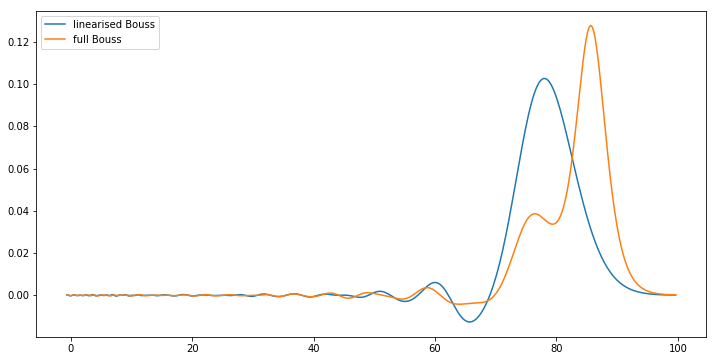

In [58]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/lbous/eta80',unpack=True)
plt.plot(a[0],a[1],label='linearised Bouss')
b = np.loadtxt('flat_results/fbous/eta80',unpack=True)
plt.plot(b[0],b[1],label='full Bouss')
plt.legend()

The main difference are the non-linearities. The full Boussinesq equations lead to dispersive and non-linear waves, whereas the linearised Boussinesq equations lead to linear dispersive waves.

The leading wave of the full Boussinesq solution may be a solitary wave, because a solitary wave is a solution of the full Boussinesq equations.

### d) NLSW

In [59]:
!cat flat_results/nlsw4-1/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
400
! give equation type/LSW/
NLSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
82
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:81;5


In [60]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/nlsw4-1/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [61]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

This wave solution is just nonlinear, without dispersion. These ripples are consequences of the nonlinearity. The wave solution gets steeper with time. The code breaks down when the wave front reaches a vertical wall.

Now we make the grid coarser to see possible dramatical changes. Again $\Delta x = 1 $

In [62]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/nlsw4d2/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [63]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,81,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

We can see that the ripples appear with both grid resolutions, but are more dramatical with a coarser resolution. These ripples are artifacts for sure, because they change drastically in quantity and shape using different grid sizes.

So far we run the sbouss code with an initial condition that splits into two equal wave travelling in each directions. We use the LSW, linearised Boussinesq, full Boussinesq, and the NLSW equations. We have seen dispersive and non-linear effects, and artifacts. In the next section, we want to focus on the physical effects only.

### e) Shapes before the artifacts

Here, we want to focus on the shape change of the wave solution by using the different equation types.

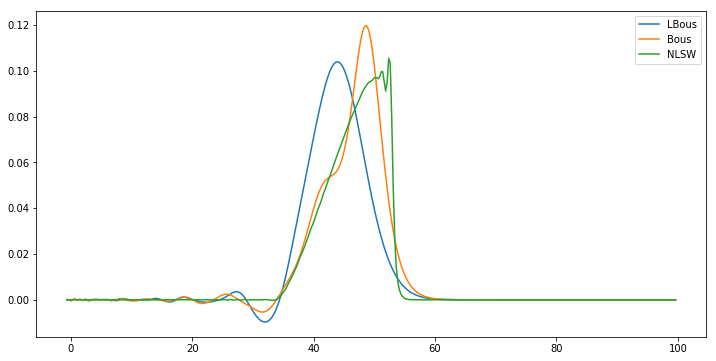

In [64]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/lbous/eta45',unpack=True)
plt.plot(a[0],a[1], label='LBous')
b = np.loadtxt('flat_results/fbous/eta45',unpack=True)
plt.plot(b[0],b[1], label='Bous')
c = np.loadtxt('flat_results/nlsw4-1/eta45',unpack=True)
plt.plot(c[0],c[1], label='NLSW')
plt.legend()

The back part of the wave moves faster than the front, then the wave steepens. In reality, the wave will break after certain inclination, but a breaking wave is not solution of our numerical equations. When the equation considers the nonlinearities (Boussinesq and NLSW), the breaking wave is "substituted" by non linearities in the crest. If the equations are not dispersive (NLSW), this nonlinearities grow very fast as there is no dissipation of energy.  If the dispersion is present(full Boussinesq), then the nonlinearities in the crest are smaller as there is dispersion behind the wave. When the equations are linear (linearized Boussinesq), the dispersion is bigger and then the wave never steepens.

We come up with a possible physical interpretation to the shape change. The dispersive effect makes the front wave flatter with time, and the non-linear effect makes the front wave steeper. Considering the full Boussinesq equations, the dispersive effect weakens the non-linear effect at the leading wavefront.

##### The breaking Boussinesq solution will be modelled as an undular bore with each crest as  a solitary wave. Would this phenomena caused by the NLSW solution be called the same?

## Problem 5 . Bores

We the same initial conditions. The bathymetry is still flat but now $L=1000$. We use our $\eta$ with $x_{0}=0$ and $\lambda = 100$

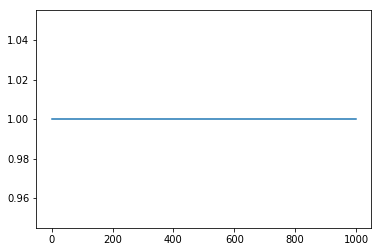

In [65]:
a = np.linspace(0,1000,200)
b = np.ones(200)
plt.plot(a,b)

The initial condition is depicted below.

In [66]:
arc = open('flat_results/bores-nl/h','w')
np.savetxt(arc,np.c_[a,b])
arc.close()

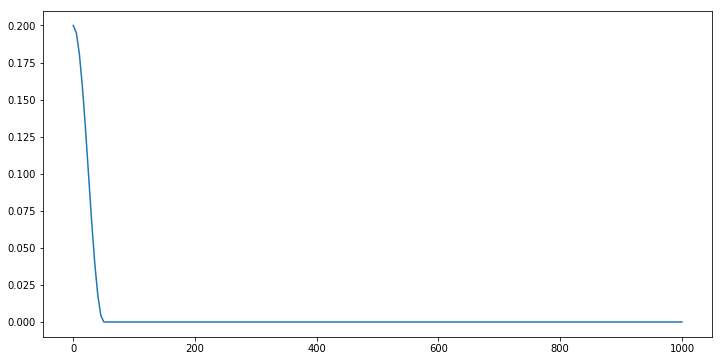

In [67]:
ola = eta(a,0,100)
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
plt.plot(a,ola)

### a) NLSW and Boussinesq, t < 200

In [68]:
arc = open('flat_results/bores-nl/eta.in','w')
np.savetxt(arc,np.c_[a,ola])
arc.close()

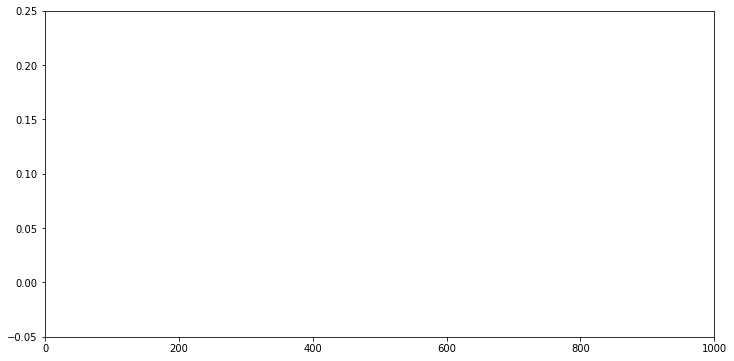

In [69]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlim(( -0.5, 1000))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)
time_text = ax.text(0.8, 1.1, '', fontsize=20,transform=ax.transAxes)

For the NLSW solution:

In [70]:
!cat flat_results/bores-nl/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
4000
! give equation type/LSW/
NLSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
600
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:600;10


In [71]:
def animate(i): #(i,path)
    num = str(i)
    a = np.loadtxt('flat_results/bores-nl/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [72]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(5,205,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

For the Bousinesq solution, same input as for NLSW:

In [73]:
!cat flat_results/bores-bous/indat

!give bathimetry option/readfromfile/
readfromfile
! give depth file/
h 
!Give number of grid points/ 100/
4000
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data/eta.in/
eta.in
!give u1-data
stop
!Number of cycles
800
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:800;10


In [74]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/bores-bous/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [75]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(5,205,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

Both solutions, NLSW and Boussinesq, are quite similar before $t=200s$. So we are looking at the point where the changes are noticeable.

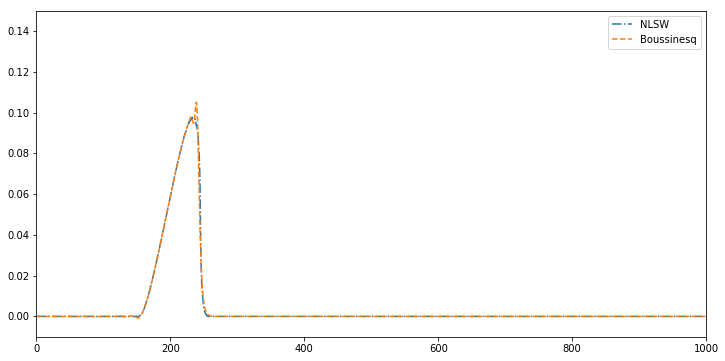

In [76]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/bores-nl/eta205',unpack=True)
plt.plot(a[0],a[1],'-.',label='NLSW')
b = np.loadtxt('flat_results/bores-bous/eta205',unpack=True)
plt.plot(b[0],b[1],'--',label='Boussinesq')
plt.xlim(0,1000)
plt.ylim(-0.01,0.15)
plt.legend()

We see that at and after in $t=205$ we have a very small difference in the peak. The bousinesq starts showing artifacts in the crest of the wave.

### b) Boussinesq and solitary wave

Let us run the Boussinesq simulation until $t=795$.

In [77]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(205,800,10),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

Below a snapshot at 795s.

Text(0.25,0.82,u't = 795s')

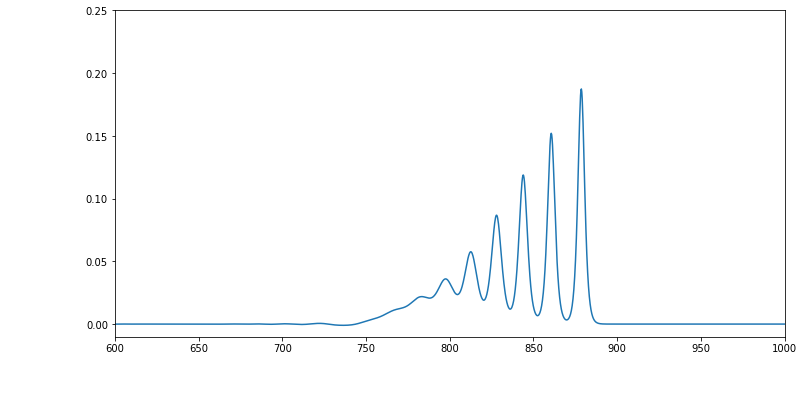

In [126]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
b = np.loadtxt('flat_results/bores-bous/eta795',unpack=True)
plt.plot(b[0],b[1])
plt.xlim(600,1000)
plt.ylim(-0.01,0.25)
plt.annotate('t = 795s', xy=(0.25,0.82))

In [127]:
crest = max(b[1][3400:3500])
x0 = list(b[1]).index(crest)

We compare the solution of the Boussinesq equations with the solitary wave profile given in class:

$\eta = \alpha\, sech^{2}\left( \frac{1}{2} \sqrt{3\alpha} \left( x - ct \right) \right), \quad c = \left( 1 + \frac{1}{2} \alpha \right)$

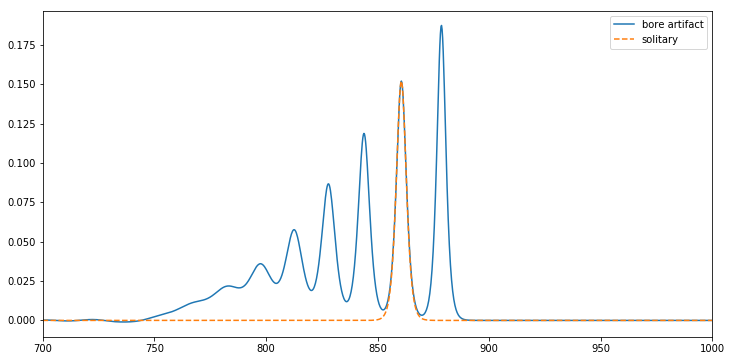

In [128]:
alpha = crest

def sech2(x):
    return 1/(np.cosh(x))**2

argum = 0.5*np.sqrt(3*alpha)*(b[0]-b[0][x0])
ola = alpha*sech2(argum)
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
plt.plot(b[0],b[1], label='bore artifact' )
plt.plot(b[0],ola,'--', label='solitary')
plt.xlim(700,1000)
plt.legend()


It looks like each wavelet of the bore artifacts is a solitary wave solution.

### c) Undular bore = a sequence of solitary waves

Here we use a solitary wave as initial conditon in order to simulate physical undular bores.

To make the new bathymerty file, we use $L=150$, $h=1$ when $x<40$ and $h=0.2$ when $50<x<150$. Then for $40 \leq x \leq 50$ we have a constant slope of $-0.08$.

A bore is a transition between two uniform free-surface flows with different flow depths. 
If the undisturbed water level is denoted by $h_0$ and the incident water level is given by $h_0 + a_0$, we can denote by $\alpha = a_0/h_0$ the strength of the bore.

Here the strength of the bore is $\alpha = 0.2/1 = 0.2$.


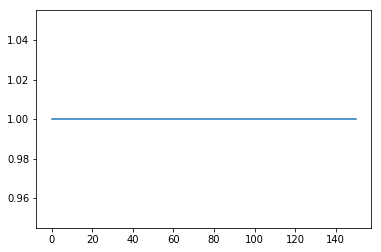

In [82]:
a = np.loadtxt('flat_results/flat1/h',unpack=True)
plt.plot(a[0],a[1])

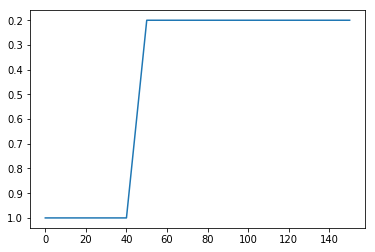

In [83]:
h = np.zeros(len(a[0]))
for i in range(len(h)):
    if a[0][i]<40:
        h[i] = 1.
    elif a[0][i]<50:
        h[i] = 4.2-0.08*(a[0][i])
    elif a[0][i] <= 150:
        h[i] = 0.2
plt.plot(a[0],h)
plt.gca().invert_yaxis()

In [84]:
arc = open('flat_results/bores-c/h','w')
np.savetxt(arc,np.c_[a[0],h])
arc.close()

In [85]:
!cat flat_results/bores-c/indat

!give bathimetry option/readfromfile/
readfromfile
! give filename/
h 
!Give number of grid points/ 100/
600
! give equation type/LSW/
Bouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
sol
!give a/h/  0.200000003/
0.050000000
!give initial position/  40./
20
! Prop. towards decreasing x/ja/
no
!Number of cycles
200
!give time interval
1
!give reduction factor for dt/dx
0.5
!times for printing
1 4:201;5


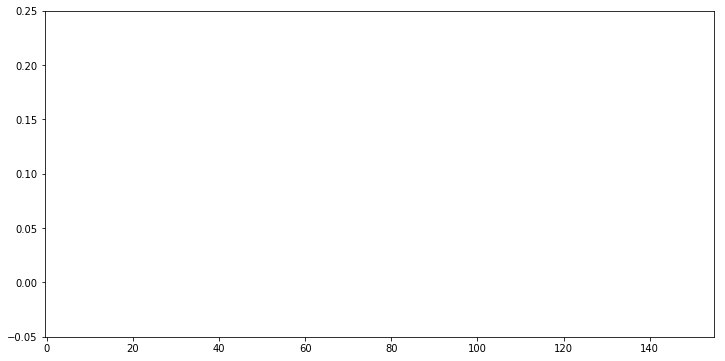

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlim(( -0.5, 155))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)
time_text = ax.text(0.8, 1.1, '', fontsize=20,transform=ax.transAxes)

Below you see the Boussinesq animation of a propagating wave while the underground is shoaling.

In [87]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/bores-c/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [88]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,201,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

The physical effects seem to be the same as the numerical effects in the previous subproblem. A sequence of crests are produced at the critical point. In the previous subproblem the critical point is the time when the crest's front wal gets too steep. In nature, the wave would break, but the code tries to model the "breaking wave" as a solitary wave solution. That is constalntly repeated and results in an undular bore.

In this subproblem the critical point is the time when the wave reaches the linear slope. The solitary wave splits into two waves. A reflected wave travels back due to the shoaling and a transmitted wave travels further in the same direction.

The forward moving wave is directly above the linear slope and produces bores. The bore velocity is the average velocity of the wave velocity before and after the slope.

Each crest is a solitary wave solution.

The relation to the previous subproblem is the existence of solitary waves in the undular bore.



## Problem 6 Numerical dispersion 

We compare numerical dispersion with physical dispersion in this last problem. The numerical dispersion is simulated by the LSW equations and the physical dispersion by the linearised Boussinesq equations.

You see the bathymetry profile below ($h_0 = 1$)

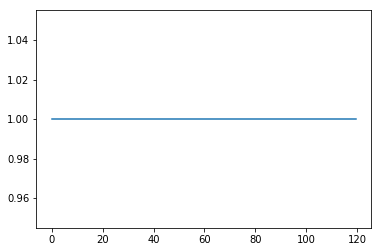

In [134]:
l = np.arange(0,120,0.5)
h = np.ones(len(l))
plt.plot(l,h)

The initial condition at $x = 0$ is shown below:

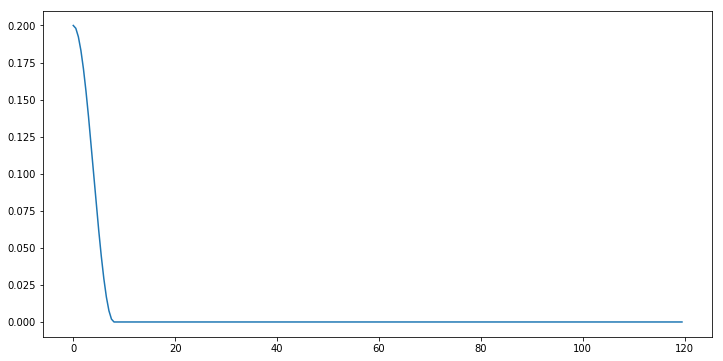

In [135]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
ola = eta(l,0,16)
plt.plot(l,ola)

In [90]:
arc = open('flat_results/last1/h','w')
np.savetxt(arc,np.c_[l,h])
arc.close()
arc = open('flat_results/last1/eta.in','w')
np.savetxt(arc,np.c_[l,ola])
arc.close()

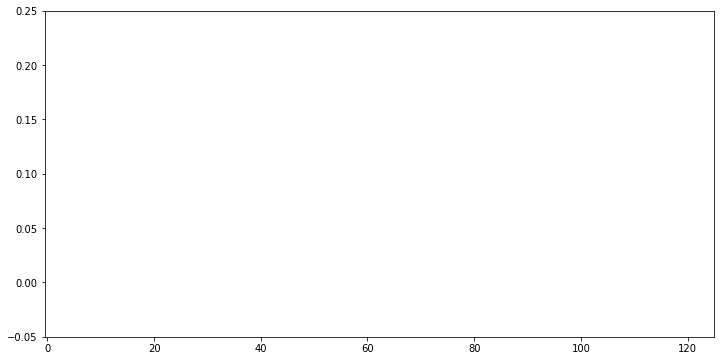

In [136]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlim(( -0.5, 125))
ax.set_ylim((-0.05, 0.25))

line, = ax.plot([], [], lw=2)
time_text = ax.text(0.8, 1.1, '', fontsize=20,transform=ax.transAxes)

We start with the linearised Boussinesq simulation. The paramters are:

$\Delta x = \Delta t = 0.5$, so that the solution is exact ($Co = \frac{\sqrt{h_0}\Delta t}{\Delta x} = 1$. The dispersion is caused physically only and there is absolutely no numerical dispersion.

In [92]:
!cat 'flat_results/last1/indat'

! give bathimetry option/readfromfile/
readfromfile
! give depthfilename/  h/
h
!Give number of grid points/ 260/
260
! give equation type/LBouss/
LBouss
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data name of file/
eta.in
! give u1-data
stop
! Prop. towards decreasing x/ja/
no
!Number of cycles
252
!give time interval
-1
!give timestep
0.5
!give number of time steps in interval directly
2
!times for printing
1 4:250;5



Below an animation of the linearised Boussinesq simulation:

In [137]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/last1/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [138]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,251,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

That was the simulation using the linearised Boussinesq equations. Next, we simulate the same wave using the LSW equations.

The paramters are:

$\Delta x = 0.5 \cdot \sqrt{17} \text{ and } \Delta t = 0.5$. This time the solution is not exact anymore, because $Co = \frac{\sqrt{h_0}\Delta t}{\Delta x} = \frac{1}{\sqrt{17}} = 0.243 < 1$. Therfore numerical dispersion occurs, and only numerical.

In [96]:
!cat 'flat_results/last2/indat'

! give bathimetry option/readfromfile/
readfromfile
! give depthfilename/  h/
h
!Give number of grid points/ 260/
63
! give equation type/LBouss/
LSW
!Employ discrete correction term
no
!give initial condition/readfromfile/
readfromfile
!give eta-data name of file/
eta.in
! give u1-data
stop
! Prop. towards decreasing x/ja/
no
!Number of cycles
252
!give time interval
-1
!give reduction factor for dt/dx
0.5
!give timsteps in interval
2
!times for printing
1 4:250;5


Below the LSW animation:

In [139]:
def animate(i):
    num = str(i)
    a = np.loadtxt('flat_results/last2/eta'+num,unpack=True)
    line.set_data(a[0], a[1])
    time_text.set_text('time = %i' % i)
    return (line, time_text,)

In [140]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,251,5),init_func=init, interval=150, blit=False)
HTML(anim.to_html5_video())

Let us depict both the linear Boussinesq and the LSW solutions at a time just before they reach the border, e.g. at $t=105s$.

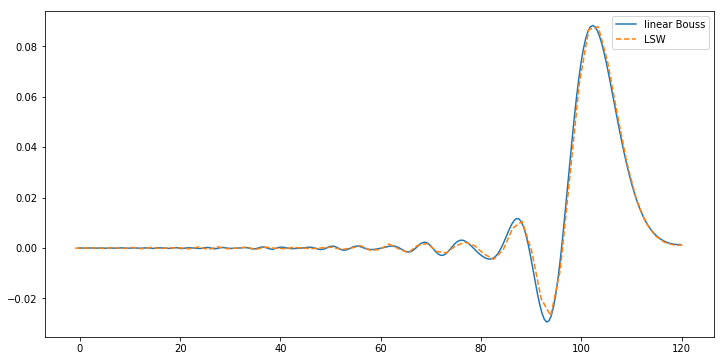

In [141]:
fig1 = plt.figure(figsize=(12, 6))
ax1 = fig1.add_subplot(1, 1,1)
a = np.loadtxt('flat_results/last1/eta105',unpack=True)
plt.plot(a[0],a[1],label='linear Bouss')
b = np.loadtxt('flat_results/last2/eta105',unpack=True)
plt.plot(b[0],b[1],'--',label='LSW')
plt.legend(loc='best')

Both solutions are very similar due to the choice of the Courant number $Co$ for the LSW simulation.

The expression of $\omega$ for the Boussinesq equations is similar to the numerical dispersion relation for the LSW equations:

$$\omega = \pm \sqrt{h_0} k \Big(1-b \cdot (kh_0)^2 + O((kh_0)^4) \Big)$$

Having a look at the first problem, $b = \frac{1}{6}$ for the physical dispersion relation of the Boussinesq equations, and $b = \frac{\Delta x^2}{24h_0^2} - \frac{\Delta t^2}{24}$ for the numercial dispersion relation of the LSW equations.

We shall get approximatly the same dispersion properties for the numerical LSW solution as for the exact Boussinesq solution when we set

$$\frac{\Delta x^2}{24h_0^2} - \frac{\Delta t^2}{24} = \frac{1}{6}$$

After some transformations we get $\Delta x = h_0 \sqrt{4+\Delta t^2}$. Setting $\Delta t = 0.5$ according to the problem task, we get $\Delta x = 0.5 \cdot \sqrt{17}$, which is the value given in the problem task.

Taken together, both solutions are so similar due to similar dispersion properties, no matter if it is numerical or physical dispersion.